<a href="https://colab.research.google.com/github/jkm2000korea/master_degree/blob/main/8%EC%A3%BC%EC%B0%A8_Classification_Performance_20240422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/데이터마이닝_2024/예제 데이터')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('ownerExample.csv')
df1

,Class,Probability
0,owner,0.9959
1,owner,0.9875
2,owner,0.9844
3,owner,0.9804
4,owner,0.9481
5,owner,0.8892
6,owner,0.8476
7,nonowner,0.7628
8,owner,0.7069
9,owner,0.6807


In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.8 MB/s eta 0:00:00


In [ ]:
from dmba import classificationSummary

predicted = ['owner' if p > 0.5 else 'nonowner' for p in df1.Probability]
classificationSummary(df1.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11


In [ ]:
predicted = ['owner' if p > 0.25 else 'nonowner' for p in df1.Probability]
classificationSummary(df1.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11


In [ ]:
predicted = ['owner' if p > 0.75 else 'nonowner' for p in df1.Probability]
classificationSummary(df1.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

df2 = pd.read_csv('liftexample.csv')
df2

,prob,actual
0,0.995,1
1,0.998,1
2,0.985,1
3,0.980,1
4,0.948,1
5,0.889,1
6,0.847,1
7,0.762,0
8,0.706,1
9,0.680,1


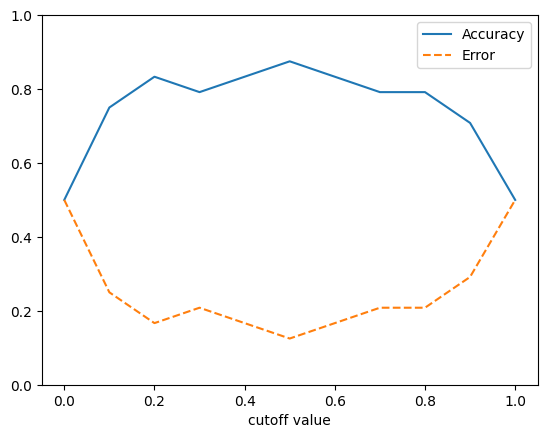

In [ ]:
cutoffs = [i*0.1 for i in range(0,11)]
a = []
for cutoff in cutoffs:
  predicted = [1 if p > cutoff else 0 for p in df2.prob]
  a.append(accuracy_score(df2.actual, predicted))

line_accuracy = plt.plot(cutoffs, a, '-', label = 'Accuracy')
line_erro = plt.plot(cutoffs, [1-acc for acc in a], '--', label = 'Error')

plt.ylim([0,1])
plt.xlabel('cutoff value')
plt.legend()
plt.show()

In [ ]:
print(cutoffs)
print(a)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[0.5, 0.75, 0.8333333333333334, 0.7916666666666666, 0.8333333333333334, 0.875, 0.8333333333333334, 0.7916666666666666, 0.7916666666666666, 0.7083333333333334, 0.5]


In [ ]:
#### ROC curve

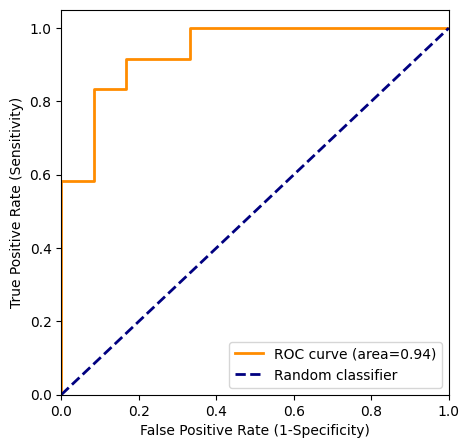

Best Threshold = 0.656000


In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import argmax

fpr, tpr, thresholds = roc_curve(df2.actual, df2.prob) #FPR, TPR, Thresholds를 생성
roc_auc = auc(fpr, tpr) #각각의 FPR, TPR, Thresholds에 따른 AUC 계산
gap = tpr - fpr  #TPR-FPR의 차이 계산
ix = argmax(gap)  #차이가 가장 큰 곳이 Best Balance between sensitivity and specificity
best_thresh = thresholds[ix]  #차이가 가장 클 때의 threshold 값 도출

plt.figure(figsize = [5,5])
plt.plot(fpr, tpr, color = 'darkorange', lw=2,
         label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

print('Best Threshold = %f' % (best_thresh))


In [ ]:
thresholds

array([1.998, 0.998, 0.847, 0.762, 0.656, 0.622, 0.505, 0.337, 0.217,
       0.003])

In [ ]:
roc_auc

0.9375